In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salaly-prediction-for-beginer/Salary Data.csv


In [2]:
# !pip install streamlit

In [3]:
import pandas as pd                               
import math as m
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline                
from sklearn.impute import SimpleImputer 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor                     
from sklearn.compose import ColumnTransformer        
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error          
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/kaggle/input/salaly-prediction-for-beginer/Salary Data.csv") # store data into df

In [5]:
print(df.dtypes)      
print("\n", df.head()) 

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

     Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


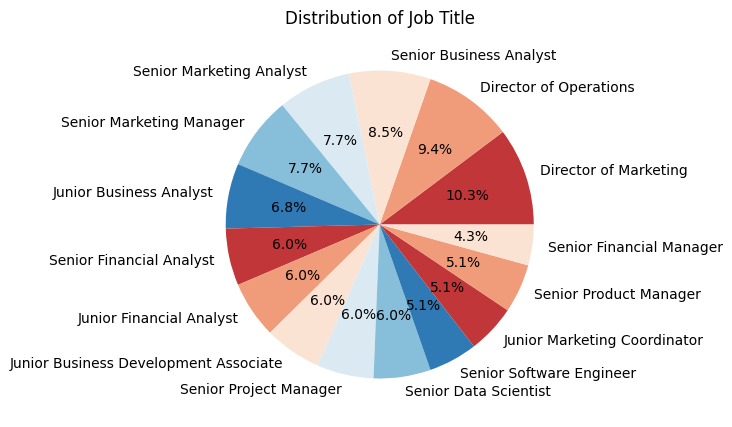

In [6]:
values = df['Job Title'].value_counts().nlargest(15).values.round(2)
index = df['Job Title'].value_counts().nlargest(15).index

color = sns.color_palette('RdBu')
plt.figure(figsize=(7,5))
# pie chart of column
plt.title('Distribution of Job Title')
plt.pie(values, labels=index,autopct='%1.1f%%',colors=color)
plt.show()

In [7]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [8]:
df.duplicated().sum()


50

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
object_data = df.select_dtypes(include = 'object')
for column in object_data.columns:
    print('column ',df[column].mode()[0])
    df[column].fillna(df[column].mode()[0],inplace = True)

column  Male
column  Bachelor's
column  Director of Operations


In [11]:
numeric_data = df.select_dtypes(exclude = 'object')
for column in numeric_data.columns:
    print(column,df[column].mean(),df[column].median())
    df[column] = df[column].fillna(df[column].median())

Age 37.382716049382715 36.5
Years of Experience 10.058641975308642 9.0
Salary 99985.64814814815 95000.0


In [12]:
for column in object_data.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    print(le.classes_)

['Female' 'Male']
["Bachelor's" "Master's" 'PhD']
['Account Manager' 'Accountant' 'Administrative Assistant'
 'Business Analyst' 'Business Development Manager'
 'Business Intelligence Analyst' 'CEO' 'Chief Data Officer'
 'Chief Technology Officer' 'Content Marketing Manager' 'Copywriter'
 'Creative Director' 'Customer Service Manager' 'Customer Service Rep'
 'Customer Service Representative' 'Customer Success Manager'
 'Customer Success Rep' 'Data Analyst' 'Data Entry Clerk' 'Data Scientist'
 'Digital Content Producer' 'Digital Marketing Manager' 'Director'
 'Director of Business Development' 'Director of Engineering'
 'Director of Finance' 'Director of HR' 'Director of Human Capital'
 'Director of Human Resources' 'Director of Marketing'
 'Director of Operations' 'Director of Product Management'
 'Director of Sales' 'Director of Sales and Marketing' 'Event Coordinator'
 'Financial Advisor' 'Financial Analyst' 'Financial Manager'
 'Graphic Designer' 'HR Generalist' 'HR Manager' 'Help D

In [13]:
df.corr()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
Age,1.000000,-0.025358,0.540180,0.118804,0.979191,0.916545
Gender,-0.025358,1.000000,-0.026629,0.035267,-0.001832,0.075013
Education Level,0.540180,-0.026629,1.000000,0.116060,0.573754,0.661544
Job Title,0.118804,0.035267,0.116060,1.000000,0.105868,0.136005
Years of Experience,0.979191,-0.001832,0.573754,0.105868,1.000000,0.924454
Salary,0.916545,0.075013,0.661544,0.136005,0.924454,1.000000


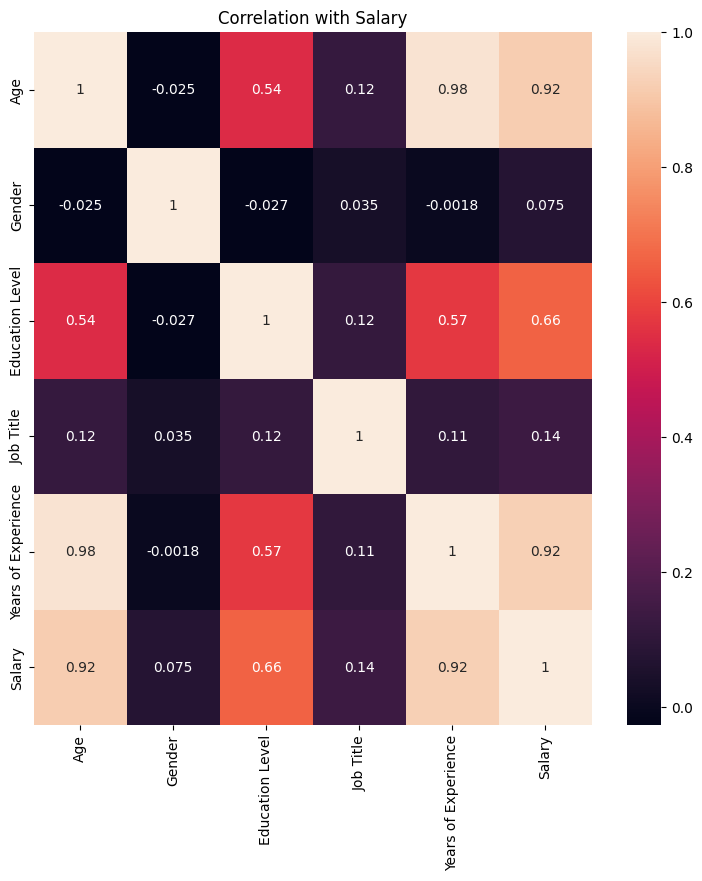

In [14]:
plt.figure(figsize=(9,9))
correlation = df.corr()
sns.heatmap(correlation, annot=True)
plt.title("Correlation with Salary")
plt.show()

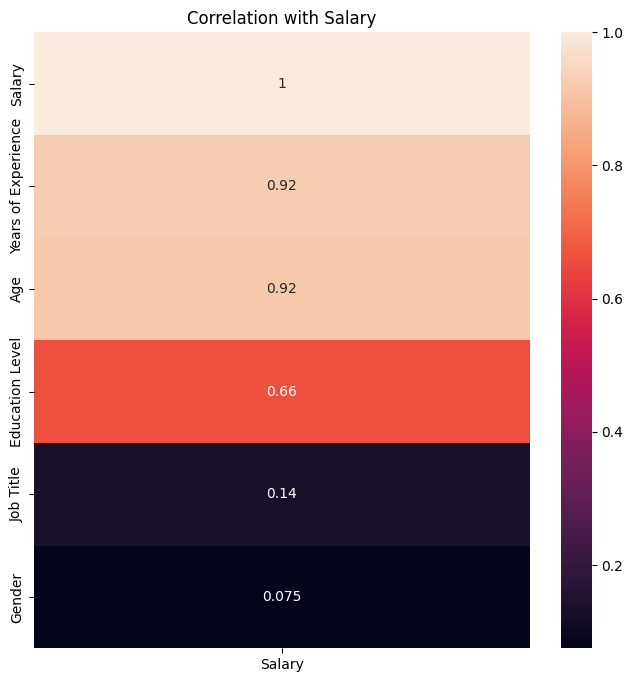

In [15]:
plt.figure(figsize=(8,8))
correlation = df.corr()
sns.heatmap(correlation[['Salary']].sort_values(by='Salary', ascending=False), annot=True)
plt.title("Correlation with Salary")
plt.show()

# Split Data

In [16]:
x =df.drop('Salary',axis = 1)
y = df['Salary']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
x_train

,Age,Gender,Education Level,Job Title,Years of Experience
172,36.5,1,0,30,9.0
183,27.0,1,0,69,2.0
17,39.0,1,2,116,12.0
24,41.0,1,1,37,13.0
132,40.0,0,1,154,12.0
...,...,...,...,...,...
188,50.0,0,2,33,22.0
71,39.0,0,0,98,11.0
106,30.0,0,0,20,3.0
283,29.0,0,0,50,1.5


In [19]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
model = LinearRegression()

R2 Score =  93.48%
Mean Absolute Error =  9301.646444075783
Mean Squared Error =  148883434.17611068
Root Mean Squared Error =  12201.779959338337


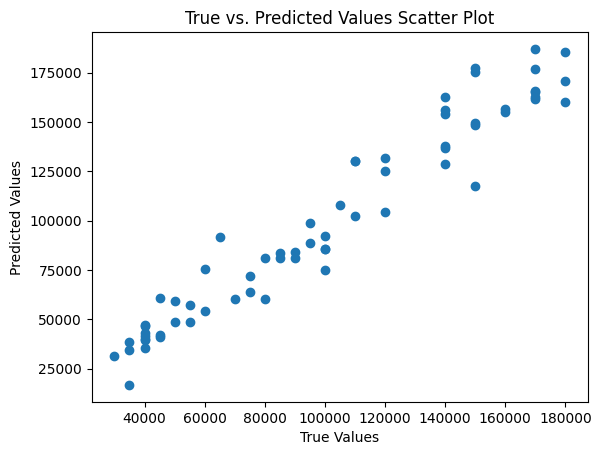

In [21]:
model.fit(x_train,y_train) 
 
# Test model
y_predict = model.predict(x_test)
#Evaluate Model
print(f"R2 Score =  {r2_score(y_test,y_predict) * 100:.2f}%")
print('Mean Absolute Error = ',mean_absolute_error(y_test, y_predict))
print('Mean Squared Error = ',mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error = ',m.sqrt(mean_squared_error(y_test, y_predict)))
 
# Scatter plot for real and predict data
plt.scatter(y_test,y_predict)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

# Add a title to the plot
plt.title("True vs. Predicted Values Scatter Plot")

# Display the plot
plt.show()

In [22]:
model_2 =  XGBRegressor()

R2 Score =  94.58%
Mean Absolute Error =  8255.630408653846
Mean Squared Error =  123815484.41507193
Root Mean Squared Error =  11127.24064694711


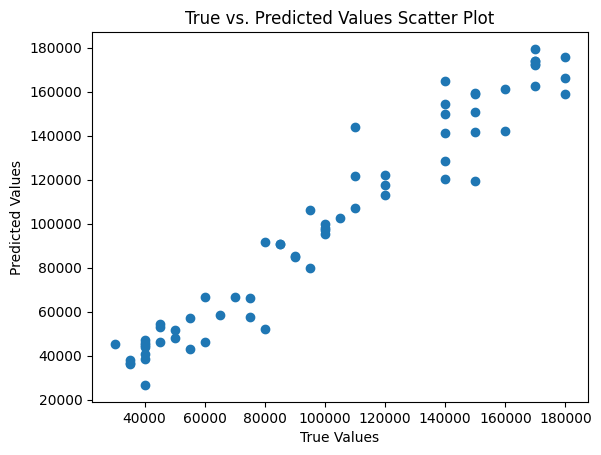

In [23]:
model_2.fit(x_train,y_train) 
 
# Test model
y_predict = model_2.predict(x_test)
#Evaluate Model
print(f"R2 Score =  {r2_score(y_test,y_predict) * 100:.2f}%")
print('Mean Absolute Error = ',mean_absolute_error(y_test, y_predict))
print('Mean Squared Error = ',mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error = ',m.sqrt(mean_squared_error(y_test, y_predict)))
 
# Scatter plot for real and predict data
plt.scatter(y_test,y_predict)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

# Add a title to the plot
plt.title("True vs. Predicted Values Scatter Plot")

# Display the plot
plt.show()


In [24]:
model_data = {
    "model": model_2,
    "label_encoders": le,
    "scaler": scaler,
    "feature_names": df.columns.tolist()
}
joblib.dump(model_data, "salary_predictor.pkl")

['salary_predictor.pkl']